In [13]:
import pickle
from diffusion.sampling import *
from diffusion.likelihood import mmff_energy
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True 
import py3Dmol
from rdkit import Chem 
from ipywidgets import interact, Dropdown
import matplotlib.pyplot as plt
from rdkit.Chem import rdMolAlign
from termcolor import colored

## Optimizing structures

In [17]:
# load conformers_20steps.pkl
conformers = pickle.load(open('conformers_20steps_boltz_T1000.pkl', 'rb'))
conformers_optimized = pickle.load(open('conformers_20steps_optimized_boltz_T1000.pkl', 'rb'))
smis = list(conformers.keys())

In [18]:
[len(conformers[key]) for key in smis], [len(conformers_optimized[key]) for key in smis]

([138, 14, 16, 24, 486, 392, 356, 140, 214, 322, 270],
 [138, 14, 16, 24, 486, 392, 356, 140, 214, 322, 270])

In [19]:

from utils.standardization import *
def get_rmsds(mols, mols_optimized):
    rmsds = []
    for conf_idx in range(len(mols)):
        rmsds.append(fast_rmsd(mols[conf_idx], mols_optimized[conf_idx], conf1=0, conf2=0) )
    return rmsds

/tmp/ipykernel_2434027/4169742543.py:10: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[0].set_xscale('log')


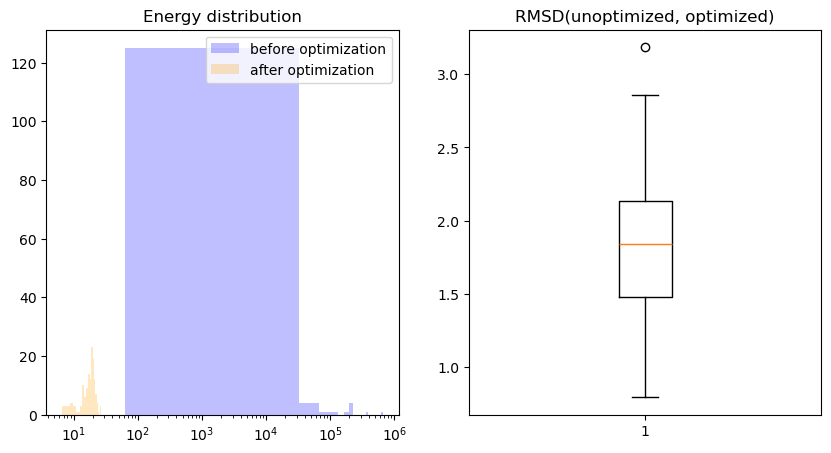

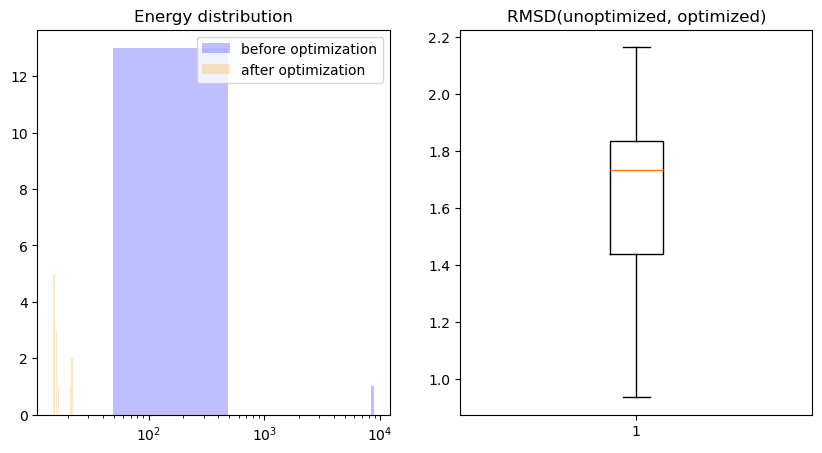

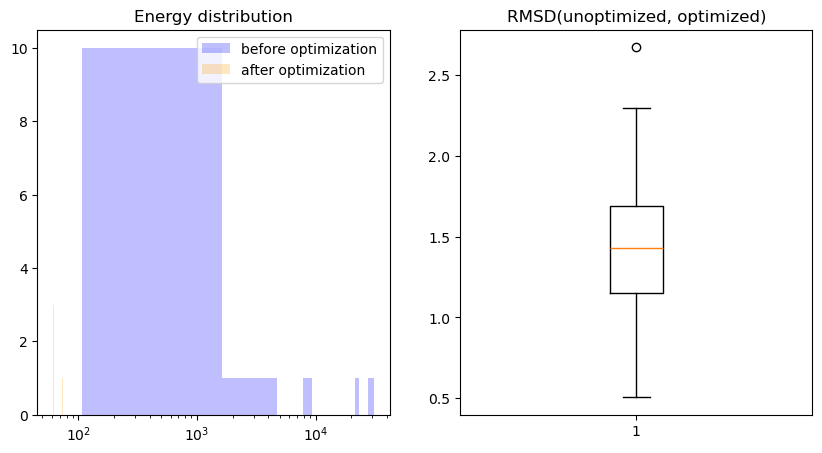

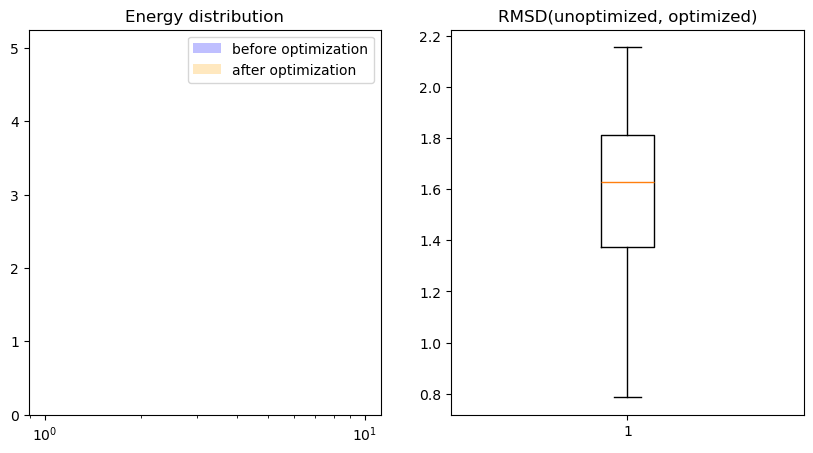

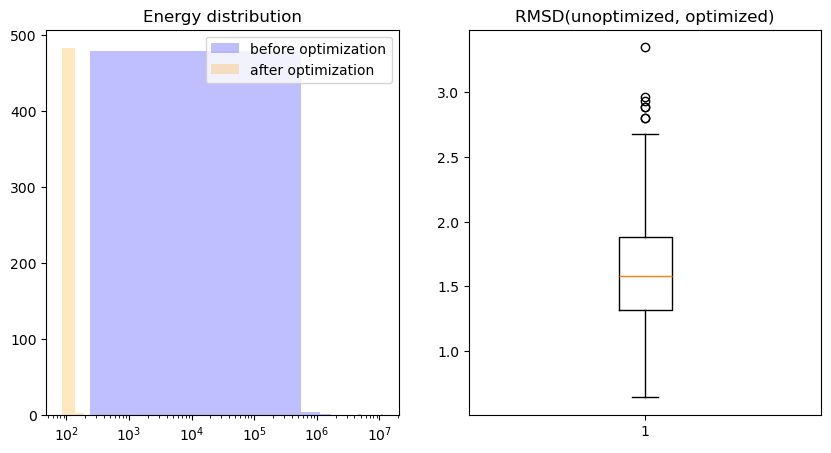

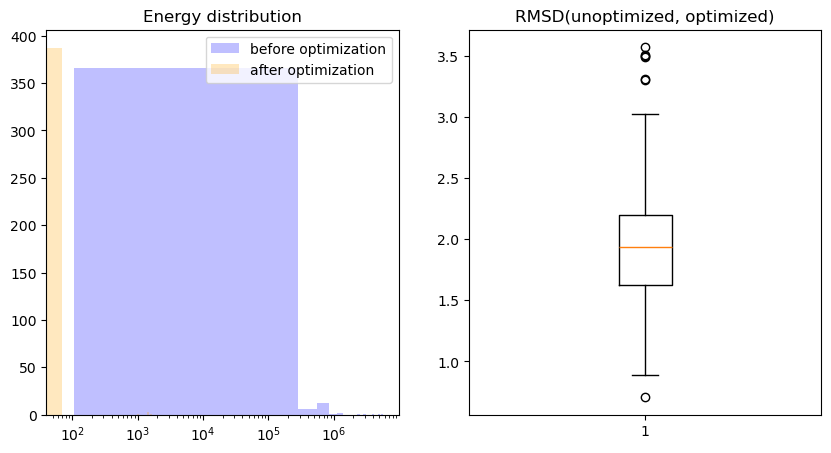

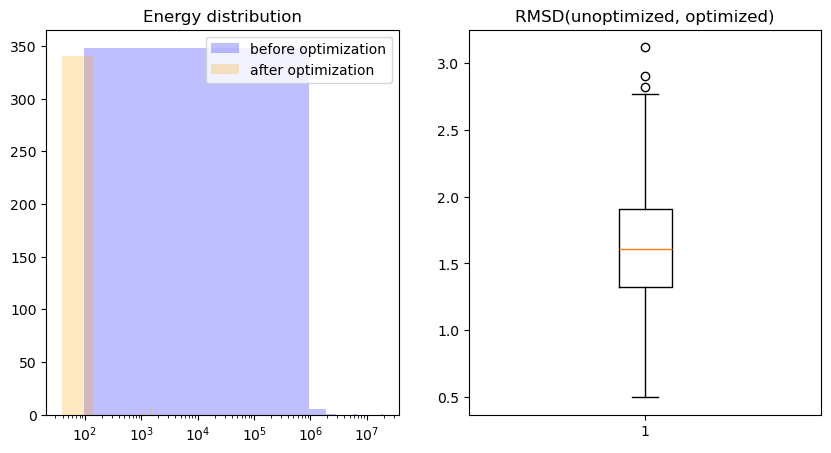

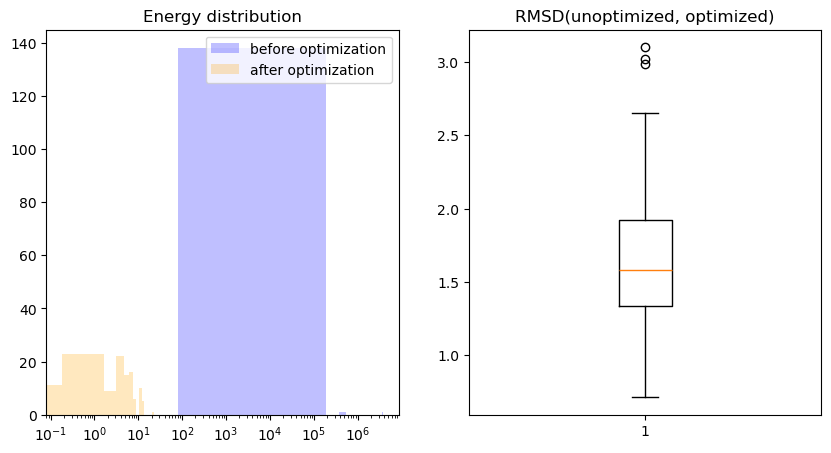

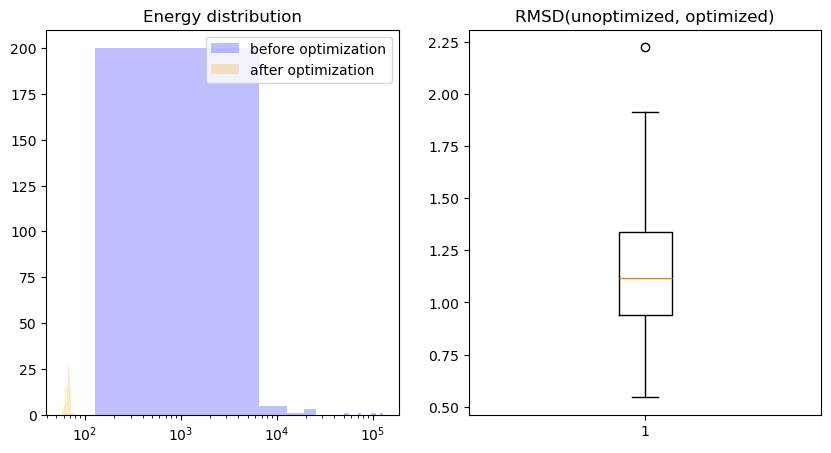

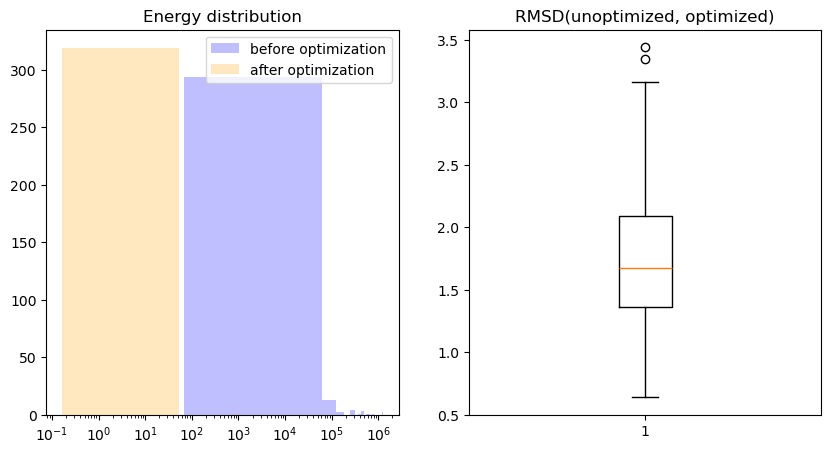

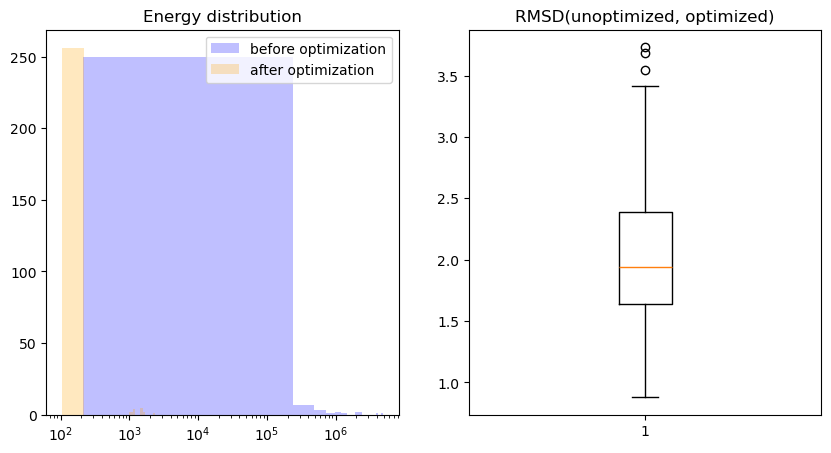

In [24]:

for i, smile in enumerate(smis): 
    #Plt figure with 2 subfigures
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    mols = conformers[smile]
    mols_optimized = conformers_optimized[smile]
    #Plot the hists in the first subfigure
    ax[0].hist([mmff_energy(mol) for mol in mols], bins=20, color = 'blue', label='before optimization', alpha=0.25,  )
    ax[0].hist([mmff_energy(mol) for mol in mols_optimized], bins=20, color = 'orange',label='after optimization', alpha=0.25)
    ax[0].legend()
    ax[0].set_xscale('log')
    ax[0].set_title(f'Energy distribution')
    # Plot the RMSD in the second subfigure
    rmsds = get_rmsds(mols, mols_optimized)
    ax[1].boxplot(rmsds)
    ax[1].set_title(f'RMSD(unoptimized, optimized)')
    #Add title for the whole figure
    i+=1
    #if i ==1:
        #break


### Comparing structures before and after optimization

In [25]:
conf_idx =3
print('RMSD',fast_rmsd(mols[conf_idx], mols_optimized[conf_idx], conf1=0, conf2=0) )

mol1, mol2 =mols[conf_idx], mols_optimized[conf_idx]
rdMolAlign.AlignMol(mol1, mol2)

# Convert to mol blocks
mol1_block = Chem.MolToMolBlock(mol1)
mol2_block = Chem.MolToMolBlock(mol2)

view = py3Dmol.view(width=400, height=400)
view.addModel(mol1_block, "mol")
view.addModel(mol2_block, "mol")
view.setStyle({'model': 0}, {'stick': {'color': 'red'}})
view.setStyle({'model': 1}, {'stick': {'color': 'blue'}})
view.addLabel('Before (red) vs after (bue) optimization}',{'position': {'x': 0, 'y': 8, 'z': 0}, 
               'backgroundColor': 'white', 
               'fontColor': 'black', 
               'fontSize': 16, 
               'alignment': 'topCenter'})
view.zoomTo()

# Show the viewer
view.show()

RMSD 1.6411845939662062


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [1]:
# read csv file 
import pandas as pd
csv_path = '/home/mila/l/lena-nehale.ezzine/scratch/torsional-diffusion/DRUGS/test_smiles.csv'
df = pd.read_csv(csv_path)

In [29]:
df

,smiles,n_conformers,corrected_smiles
0,C#CCNC(=O)C1=C[C@@H](c2ccc(Br)cc2)C[C@@H](OCc2...,69,C#CCNC(=O)C1=C[C@@H](c2ccc(Br)cc2)C[C@@H](OCc2...
1,C#CCOCCOCCOCCNc1nc(N2CCN(C(=O)[C@H](CCC(=O)O)n...,254,C#CCOCCOCCOCCNc1nc(N2CCN(C(=O)[C@H](CCC(=O)O)n...
2,C#Cc1ccc(C(=O)NCc2ccc(N3CCCC3=O)cc2)cc1,7,C#Cc1ccc(C(=O)NCc2ccc(N3CCCC3=O)cc2)cc1
3,C(=N/c1c(-c2ccccc2)nc2n1CCS2)\c1ccccc1,8,C(=N/c1c(-c2ccccc2)nc2n1CCS2)\c1ccccc1
4,C1CCN(c2nc(N3CCCCC3)nc(N3CCNCC3)n2)CC1,12,C1CCN(c2nc(N3CCCCC3)nc(N3CCNCC3)n2)CC1
...,...,...,...
995,c1ccc(-c2onc3cc4c(cc23)OCCO4)cc1,1,c1ccc(-c2onc3cc4c(cc23)OCCO4)cc1
996,c1ccc(C2CC3CC(c4ccco4)N2O3)cc1,3,c1ccc([C@H]2C[C@@H]3C[C@@H](c4ccco4)N2O3)cc1
997,c1ccc(COc2ccc(OCCC[NH2+]C3CCCC3)cc2)cc1,375,c1ccc(COc2ccc(OCCC[NH2+]C3CCCC3)cc2)cc1
998,c1ccc(Cn2c(CSc3nnnn3-c3ccccc3)nc3ccccc32)cc1,33,c1ccc(Cn2c(CSc3nnnn3-c3ccccc3)nc3ccccc32)cc1


## Dataset Exploration

In [10]:
from utils.dataset import *
data_dir='/home/mila/l/lena-nehale.ezzine/scratch/torsional-diffusion/DRUGS/drugs/'
split_path='/home/mila/l/lena-nehale.ezzine/scratch/torsional-diffusion/DRUGS/split_boltz_10k.npy'
mode = 'train'
dataset='drugs'
types = drugs_types
transform=None
num_workers = 1
limit_molecules = 0
cache = '/home/mila/l/lena-nehale.ezzine/scratch/torsional-diffusion/cache/test_run'
pickle_dir = '/home/mila/l/lena-nehale.ezzine/scratch/torsional-diffusion/DRUGS/standardized_pickles'
boltzmann_resampler = None

In [11]:
dataset = ConformerDataset(data_dir, split_path, mode, dataset,
                                   types, transform,
                                   num_workers,
                                   limit_molecules,
                                   cache,
                                   pickle_dir,
                                   boltzmann_resampler)

Reusing preprocessing from cache /home/mila/l/lena-nehale.ezzine/scratch/torsional-diffusion/cache/test_run.train


In [12]:
loader = DataLoader(dataset=dataset,
                            batch_size=32,
                            shuffle=False if mode == 'test' else True)

/home/mila/l/lena-nehale.ezzine/.conda/envs/torsional_diffusion/lib/python3.9/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [13]:
canonical_smis = []
for batch in tqdm.tqdm(loader, total=len(loader)):
    canonical_smis.extend(batch.canonical_smi) 
print(len(canonical_smis))

100%|██████████| 291/291 [00:03<00:00, 78.37it/s]

9295


In [48]:
batch.canonical_smi

['ON=Cc1cn(-c2ccccc2)nc1-c1ccccc1',
 'Oc1c(Br)cc(Br)cc1CNc1ccc(F)cc1',
 'Oc1c(C(Nc2cccc(C(F)(F)F)c2)c2ccncc2)ccc2cccnc12',
 'Oc1c(C(Nc2ccccn2)c2ccccn2)ccc2cccnc12',
 'Oc1c(C(Nc2ccccn2)c2cccnc2)cc(Cl)c2cccnc12',
 'Oc1c(C(c2ccccc2)N2CCCCC2)sc2ncnn12',
 'Oc1c(C(c2ccccn2)N2CCC(Cc3ccccc3)CC2)cc(Cl)c2cccnc12',
 'Oc1c(C(c2cccs2)N2CCN(c3ccccc3)CC2)sc2ncnn12',
 'Oc1c(C=NCc2ccc(F)cc2)[nH]c2ccc(Br)c(Cl)c12',
 'Oc1c(C=Nc2ccc(Cl)cn2)sc2ccccc12',
 'Oc1cc(Cc2ccccc2)cnc1CN1CCCCC1',
 'Oc1cc(O)c2c(c1)OC(c1cc(O)c(O)c(O)c1)C(O)C2',
 'Oc1cc2c(cc1O)C(Cc1cccc3ccccc13)NCC2',
 'Oc1ccc(-c2csc(-c3c[nH]c4ccccc34)n2)c(O)c1',
 'Oc1ccc(-c2csc(Nc3ncccn3)n2)cc1O']

In [37]:
[mmff_energy(mol) for mol in batch.mol]

[107.53425762632584,
 37.26679530596662,
 147.73190956610662,
 86.1130549393562,
 68.54063660500674,
 158.011266793729,
 181.1850936806388,
 403.00329448926846,
 69.4668458039899,
 44.1853632135626,
 119.38644535677238,
 104.26307720258852,
 112.66412740083658,
 88.45324962850826,
 -25.27834762933624]

In [75]:
smi = 'C=CCOc1ccc(C2=NOC3C4CC(C23)C2C(=O)N(C)C(=O)C42)cc1'
path = '/home/mila/l/lena-nehale.ezzine/scratch/torsional-diffusion/DRUGS/drugs'
conformers = pickle.load(open(f'{path}/{smi}.pickle', 'rb'))['conformers']
mmff_energies = []
for i in range(len(conformers)):
    mmff_energies.append(mmff_energy(conformers[i]['rd_mol']))
plt.hist(mmff_energies, bins=10)

FileNotFoundError: [Errno 2] No such file or directory: '/home/mila/l/lena-nehale.ezzine/scratch/torsional-diffusion/DRUGS/drugs/C=CCOc1ccc(C2=NOC3C4CC(C23)C2C(=O)N(C)C(=O)C42)cc1.pickle'